In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib import style
style.use("ggplot")
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import lazypredict



# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [2]:
#file_path = Path("../Resources/metro_2br.csv")
#metro_df = pd.read_csv(file_path)
#metro_df.drop(columns='indicator_id', inplace=True)
#metro_df.head()


#metro_df.set_index(pd.to_datetime(metro_df['date']), inplace=True)
#metro_df.drop('date', axis=1, inplace=True)
#metro_df.head()

### Milwaukee Condo Regression

In [6]:
file_path = Path("../Resources/mil_condo.csv")
metro_df = pd.read_csv(file_path)
metro_df = metro_df.drop('indicator_id',axis=1)
metro_df = metro_df.drop('region_id',axis=1)
metro_df = metro_df.sort_values('date')
metro_df['date'] = pd.to_datetime(metro_df['date'])
metro_df = metro_df.set_index('date')
metro_df = metro_df.dropna()
metro_df.head()

,value,region,change,lagged_change
date,,,,
1996-01-31,109681.0,"Milwaukee, WI",-44.259854,-1.080328
1996-02-29,110164.0,"Milwaukee, WI",0.440368,-44.259854
1996-03-31,110314.0,"Milwaukee, WI",0.136161,0.440368
1996-04-30,110819.0,"Milwaukee, WI",0.457784,0.136161
1996-05-31,110972.0,"Milwaukee, WI",0.138063,0.457784


<AxesSubplot:xlabel='date'>

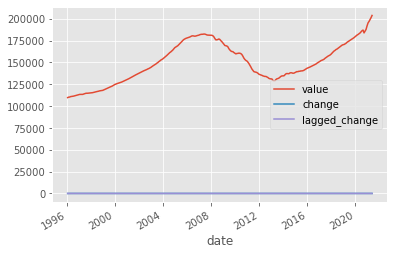

In [7]:
metro_df.plot()

In [8]:
#Build Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [9]:
# Separate the data into the X and y components
# In this case, y will be the `value` and X will be the remainign columns

#X = metro_df.drop(columns='value', axis=1)
X = metro_df.lagged_change.to_frame()
y = metro_df.change.values

In [10]:
# Fit the model to the data

model.fit(X, y)

LinearRegression()

In [11]:
predicted_y_values = model.predict(X)
predicted_y_values

array([-9.32569757e-03, -2.16934956e+00,  6.67460134e-02,  5.15282659e-02,
        6.76172443e-02,  5.16234288e-02,  5.51750902e-02,  5.29940288e-02,
        5.93126546e-02,  6.24942993e-02,  5.98433464e-02,  5.90859660e-02,
        5.82019939e-02,  5.60422437e-02,  4.38782790e-02,  4.74098963e-02,
        4.37020968e-02,  6.33848406e-02,  6.16006795e-02,  6.13247857e-02,
        5.11808601e-02,  4.44988367e-02,  5.09110755e-02,  5.04677473e-02,
        5.05046605e-02,  4.88462459e-02,  5.11880938e-02,  5.87702735e-02,
        6.05042771e-02,  5.97216221e-02,  5.12081169e-02,  5.46342871e-02,
        5.67998787e-02,  6.07032197e-02,  5.21307099e-02,  5.20346489e-02,
        5.31709936e-02,  6.52438804e-02,  6.63426510e-02,  6.77635777e-02,
        6.32622655e-02,  6.58631066e-02,  6.98443151e-02,  6.84789714e-02,
        6.55286686e-02,  6.18380067e-02,  6.90863535e-02,  7.38022206e-02,
        7.52899602e-02,  6.48279531e-02,  6.07893037e-02,  5.99407703e-02,
        6.07289536e-02,  

In [12]:
#Extracting coef, intercept

model.coef_
model.intercept_


0.04471693084951807

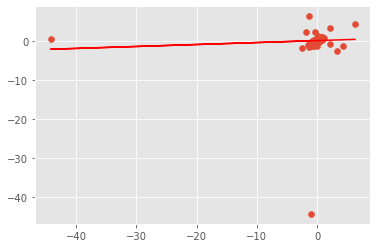

In [13]:
#Plotting Results

plt.scatter(X, y)
plt.plot(X, predicted_y_values, color='red')

In [14]:
#Metrics - score, R2, mse, rmse, std

from sklearn.metrics import mean_squared_error, r2_score

score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

In [15]:
# Print the score, r2, mse, rmse, and standard deviation
print(f"Score: {score}")
print(f"R-squared (R2 ): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation: {np.std(y)}")

Score: 0.0025026694521156356
R-squared (R2 ): 0.0025026694521156356
Mean Squared Error (MSE): 7.000919004424861
Root Mean Squared Error (RMSE): 2.645924980876227
Standard Deviation: 2.6492421463139615


In [16]:
#Build Logistic Regression

#train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [17]:
#Create Model
#classifier = LogisticRegression(solver='lbfgs', warm_start=True, random_state=78)
#classifier

In [18]:
# Train the data
#classifier.fit(X_train, y_train)

In [19]:
# Score the model
#print(f"Training Data Score: {classifier.score(X_train, y_train)}")
#print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [20]:
# Predict outcomes for test data set
#predictions = classifier.predict(X_test)
#pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

In [21]:
#Confusion Matrix
#from sklearn.metrics import confusion matrix
#confusion_matrix(y_test, predictions)

In [22]:
#Classification Report
#from sklearn.metrics import classsification report
#print(classification_report(y_test, predictions))

In [23]:
#Build LSTM Model

def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [24]:
# Predict Percent Change of Housing Prices using a 10 month window of previous fng values
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 3

# Column index 0 is the 'fng_value' column
# Column index 1 is the `Close` column
feature_column = 3
target_column = 2
X, y = window_data(metro_df, window_size, feature_column, target_column)

In [25]:
# Use 70% of the data for training and the remaineder for testing
split = int(0.8 * len(X))

X_train = X[: split]
X_test = X[split:]
y_train = y [: split]
y_test = y[split:]

In [26]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)


In [27]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

C:\ProgramData\Anaconda3\envs\deep\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\deep\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\deep\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\deep\lib\site-packages\te

In [29]:
# Build the LSTM model. 
# The return sequences need to be set to True if you are adding additional LSTM layers, but 
# You don't have to do this for the final layer. 
# Note: The dropouts help prevent overfitting
# Note: The input shape is the number of time steps and the number of indicators
# Note: Batching inputs has a different input shape of Samples/TimeSteps/Features

model = Sequential()

number_units = 10
dropout_fraction = 0.2


# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [30]:
# Compile the model
model.compile(optimizer='adam', loss="mean_squared_error")

In [31]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 3, 10)             480       
_________________________________________________________________
dropout (Dropout)            (None, 3, 10)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 3, 10)             840       
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 10)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                840       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [32]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=1, verbose=1)

Epoch 1/10
239/239 [==============================] - 4s 2ms/step - loss: 0.0096
Epoch 2/10
239/239 [==============================] - 1s 2ms/step - loss: 0.0038
Epoch 3/10
239/239 [==============================] - 1s 2ms/step - loss: 0.0033
Epoch 4/10
239/239 [==============================] - 1s 2ms/step - loss: 0.0028
Epoch 5/10
239/239 [==============================] - 1s 2ms/step - loss: 0.0030
Epoch 6/10
239/239 [==============================] - 1s 2ms/step - loss: 0.0024
Epoch 7/10
239/239 [==============================] - 1s 2ms/step - loss: 0.0024
Epoch 8/10
239/239 [==============================] - 1s 2ms/step - loss: 0.0023
Epoch 9/10
239/239 [==============================] - 1s 2ms/step - loss: 0.0025
Epoch 10/10
239/239 [==============================] - 1s 2ms/step - loss: 0.0024


In [33]:
# Evaluate the model
model.evaluate(X_test, y_test)

2/2 [==============================] - 1s 2ms/step - loss: 0.0168


0.016839919611811638

In [34]:
# Make some predictions
predicted = model.predict(X_test)

In [35]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [36]:
# Create a DataFrame of Real and Predicted values
housing = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = metro_df.index[-len(real_prices): ]) 

housing.tail()

,Real,Predicted
date,,
2021-01-31,3.258581,0.223372
2021-02-28,6.269596,0.231206
2021-03-31,-1.080328,0.224921
2021-04-30,-1.066322,0.227424
2021-05-31,-1.284846,0.223352


<AxesSubplot:xlabel='date'>

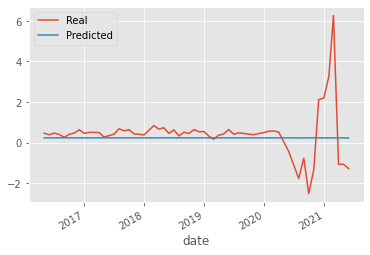

In [37]:
# Plot the real vs predicted values as a line chart
housing.plot()

In [38]:
#Lazy Predict - Regression

#from lazypredict.Supervised import LazyClassifier
#from sklearn.datasets import load_breast_cancer
#from sklearn.model_selection import train_test_split

#data = load_breast_cancer()
#X = data.data
#y= data.target

#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

#clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
#models,predictions = clf.fit(X_train, X_test, y_train, y_test)

#print(models)